<div style="text-align: center;">
    <img src="logoucm.png" style="height: 250px;">
    <br/>
    <span style="color:#888"></span>
</div>





<font size="6"><center>***Metodos numéricos en finanzas***</center></font>

<font size="5"><center><span style="color:blue">***Nombre y Apellidos: Andrés Velasco Sánchez***</span></center></font>

## Importamos las librerías necesarias

In [71]:
import numpy as np
import pandas as pd
from math import sin, cos, sqrt, log, exp, pi
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import t
import scipy.stats as si

In [72]:
m=2**(31)-1
a=16807
b=0

In [73]:

def generador_congruencial(semilla, m, a, b):
    x = semilla
    inv_m = 1 / m
    while True:
        x = (a * x + b) % m
        yield x * inv_m
def box_muller(N,ant=False):
    g_2 = generador_congruencial(123456789, m, a, b)
    n = N * 2
    U = [1 - next(g_2) if ant else next(g_2) for _ in range(n)]
    u1 = np.array(U[0::2])
    u2 = np.array(U[1::2])

    z0 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2.0 * np.pi * u2)
    z1 = np.sqrt(-2.0 * np.log(u1)) * np.sin(2.0 * np.pi * u2)
    return z0, z1


def marsaglia_method(N,ant=False):
    g_3 = generador_congruencial(123456789, m, a, b)
    X = []
    Y = []
    n = 0
    while n<N:
        U_1 = 1-next(g_3) if ant else next(g_3)
        U_2 = 1-next(g_3) if ant else next(g_3)
        v_1 = 2 * U_1 - 1
        v_2 = 2 * U_2 - 1
        R_2 = v_1**2 + v_2**2
        if R_2 >= 1:
            continue

        y = np.sqrt(-2 * np.log(R_2) / R_2)
        X.append(v_1 * y)
        Y.append(v_2 * y)
        n += 1

    return np.array(X), np.array(Y)

def brownian_motion(T, N,X,Y):
    dt = T / N
    X = [0]+X.tolist()
    Y = [0]+Y.tolist()
    X = np.cumsum(np.sqrt(dt) * np.array(X))
    Y = np.cumsum(np.sqrt(dt) * np.array(Y))
    return X, Y

import matplotlib.pyplot as plt
import seaborn as sns

def plot_variacion(df, eje_x, valores_eje, parametros_fijos, lineas_parametros, titulo_suptitle):

    
    fig, axes = plt.subplots(1, len(lineas_parametros), figsize=(6*len(lineas_parametros),5), sharey=True)
    if len(lineas_parametros) == 1:
        axes = [axes]
    
    palette = sns.color_palette("Set1", n_colors=3)
    
    for ax_idx, (param_name, valores_linea) in enumerate(lineas_parametros.items()):
        for i, val_linea in enumerate(valores_linea):
            color = palette[i % 3]
            V_call_vals = []
            V_put_vals = []
            
            for val_eje in valores_eje:
                # Construir tuplas para xs
                niveles = []
                for nivel in ['k','r','σ','T']:
                    if nivel == eje_x:
                        niveles.append(val_eje)
                    elif nivel == param_name:
                        niveles.append(val_linea)
                    else:
                        niveles.append(parametros_fijos.get(nivel, df.index.get_level_values(nivel)[0]))
                
                df_subset = df.xs(tuple(niveles), level=('k','r','σ','T'))
                V_call_vals.append(df_subset['V_call'].values[0])
                V_put_vals.append(df_subset['V_put'].values[0])
            
            ax = axes[ax_idx]
            ax.plot(valores_eje, V_call_vals, marker='o', color=color, label=f'Call {param_name}={val_linea}')
            ax.plot(valores_eje, V_put_vals, marker='s', linestyle='--', color=color, label=f'Put {param_name}={val_linea}')
            
        ax.set_xlabel(eje_x)
        ax.set_title(f"Variación con {param_name}")
        ax.grid(True)
        ax.legend(fontsize=8)
    
    axes[0].set_ylabel("Valor de la opción")
    plt.suptitle(titulo_suptitle, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
def calcular_estadisticas_montecarlo(valores):
    n_muestras = len(valores)
    media = np.mean(valores)
    varianza = np.var(valores, ddof=1)
    desviacion_std = np.std(valores, ddof=1)
    t_critico = t.ppf(0.975, df=n_muestras - 1)

    precision = t_critico * (desviacion_std / sqrt(n_muestras))

    return media, varianza, precision

def imprimir_tabla_estadisticas(df):
    print("\n" + "="*75)
    print("      RESULTADOS MONTE CARLO - OPCION CALL ASIATICA")
    print("="*75)
    print(f"{'Opción':<10} | {'Valor estimado':>15} | {'Varianza':>15} | {'Precisión (95%)':>18}")
    print("-"*75)

    for _, row in df.iterrows():
        print(f"{row['Opción']:<10} | "
              f"{row['Valor estimado']:>15.6f} | "
              f"{row['Varianza']:>15.6f} | "
              f"{row['Precisión (95%)']:>18.6f}")

    print("="*75 + "\n")

In [74]:
r = 0.03
r_c = log(1+r)
K = 14
T = 1
sigma = 0.3
S0 = 14
d_c = 0
d=0
N = 1000   


In [75]:
def black_scholes(S0, K, T, r_c, sigma, d_c):
    d1 = (np.log(S0/K) + (r_c - d_c + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    V_call = S0*si.norm.cdf(d1)-K*np.exp(-r_c*T)*si.norm.cdf(d2)
    V_put = K*np.exp(-r_c*T)*si.norm.cdf(-d2)-S0*si.norm.cdf(-d1)
    return V_call, V_put


<font size="6"><center><span style="color:blue">***Práctica 5***</span></center></font>

Para la práctica 5 vamos a desarrollar las dos estrategias **butterfly** y **strangle** a la vez que avanzamos en los distintos apartados.

- **(a.)** Teniendo en cuenta las consideraciones del apartado **b)**  y dependiendo del resultado del subyacente define y muestra la tabla de payoffs antes de desarrollar el código.  

<table style="font-size:12px; border-collapse: collapse;">
<tr>
<td style="vertical-align: top; padding-right: 20px;">

<b>Estrategia Butterfly</b><br>
<table style="font-size:12px; border-collapse: collapse;" border="1">
<tr>
<th>Índice</th><th>Compra Call K</th><th>Venta 2 Calls K''</th><th>Compra Call K'</th><th>Total</th>
</tr>
<tr><td>S &lt; K</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>K ≤ S &lt; K''</td><td>S - K</td><td>0</td><td>0</td><td>S - K</td></tr>
<tr><td>K'' ≤ S &lt; K'</td><td>S - K</td><td>-2(S - K'')</td><td>0</td><td>S - K - 2(S - K'')</td></tr>
<tr><td>K' ≤ S</td><td>S - K</td><td>-2(S - K'')</td><td>S - K'</td><td>S - K - 2(S - K'') + (S - K')</td></tr>
</table>

</td>
<td style="vertical-align: top; padding-left: 20px;">

<b>Estrategia Strangle</b><br>
<table style="font-size:12px; border-collapse: collapse;" border="1">
<tr>
<th>Índice</th><th>Compra Put K</th><th>Compra Call K'</th><th>Total</th>
</tr>
<tr><td>S &lt; K</td><td>K - S</td><td>0</td><td>K - S</td></tr>
<tr><td>K ≤ S &lt; K'</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>K' ≤ S</td><td>0</td><td>S - K'</td><td>S - K'</td></tr>
</table>

</td>
</tr>
</table>


<table style="font-size:12px; border-collapse: collapse;">
<tr>
<td style="vertical-align: top; padding-right: 20px;">

<b>Estrategia Butterfly</b><br>
<table style="font-size:12px; border-collapse: collapse;" border="1">
<tr>
<th>Índice</th><th>Compra Call 14</th><th>Venta 2 Calls 15</th><th>Compra Call 16</th><th>Total</th>
</tr>
<tr><td>S &lt; 14</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>14 ≤ S &lt; 15</td><td>S - 14</td><td>0</td><td>0</td><td>S - 14</td></tr>
<tr><td>15 ≤ S &lt; 16</td><td>S - 14</td><td>-2(S - 15)</td><td>0</td><td>-S + 16</td></tr>
<tr><td>16 ≤ S</td><td>S - 14</td><td>-2(S - 15)</td><td>S - 16</td><td>0</td></tr>
</table>

</td>
<td style="vertical-align: top; padding-left: 20px;">

<b>Estrategia Strangle</b><br>
<table style="font-size:12px; border-collapse: collapse;" border="1">
<tr>
<th>Índice</th><th>Compra Put 14</th><th>Compra Call 16</th><th>Total</th>
</tr>
<tr><td>S &lt; 14</td><td>14 - S</td><td>0</td><td>14 - S</td></tr>
<tr><td>14 ≤ S &lt; 16</td><td>0</td><td>0</td><td>0</td></tr>
<tr><td>16 ≤ S</td><td>0</td><td>S - 16</td><td>S - 16</td></tr>
</table>

</td>
</tr>
</table>


- **(b.)** Obtener mediante simulación el valor de una estrategia **butterfly** formada por la compra de una opción call europea con strike $K$, la compra de otra opción europea con strike $K'>K$ y la venta de dos opciones call europeas con strike $K''$ tal que $K<K''<K'$, todas sobre el mismo subyacente.  
Aplicarlo suponiendo los datos de las prácticas anteriores con $K = 14, K' = 16$ y $K'' = 15$. También hacemos lo mismo para la estrategia **strangle**



Podemos estudiar la simulación del valor de una estrategia como las simulaciones del valor de las distintas opciones que componen la estrategia. 
En el caso de la estrategia **butterfly**, estimariamos las 3 opciones call con distintos strike:
$$
coste_{butterfly} = V_{call}(S0,K) - 2 \cdot V_{call}(S0,K'') + V_{call}(S0,K')
$$
Observamos que la opción call con $K''$ está restando, debido a que vendemos dichas opciones.

Para la estrategia **strangle**:

$$
coste_{strangle} = V_{put}(S0,K) + V_{call}(S0,K')
$$

Además el broker, como intermediario, aplica una comisión del $5\%$ sobre el coste total de la estrategia.
$$
coste_{butterfly}' = coste_{butterfly} \cdot 1.05 \quad coste_{strangle}' = coste_{strangle} \cdot 1.05
$$

Para las estimaciones de los valores de las distintas opciones nos vamos a basar en la fórmula de **Black-Scholes**, con los mismos parámetros que las anteriores prácticas excepto el strike que va variando.

In [76]:
K=14
K_2=15
K_1=16


V_call_k,V_call_put= black_scholes(S0, K, T, r_c, sigma,d_c)
V_call_k_2,_= black_scholes(S0, K_2, T, r_c, sigma,d_c)
V_call_k_1,_= black_scholes(S0, K_1, T, r_c, sigma,d_c)


In [77]:
coste_butterfly = (V_call_k.mean()-2*V_call_k_2.mean()+V_call_k_1.mean())
coste_butterfly_comision = coste_butterfly * 1.05
print('Coste butterfly sin comisión:', coste_butterfly)
print('Coste butterfly con comisión:', coste_butterfly_comision)



Coste butterfly sin comisión: 0.08256212601737545
Coste butterfly con comisión: 0.08669023231824423


In [78]:
coste_strangle = (V_call_put.mean()+V_call_k_1.mean())
coste_strangle_comision = coste_strangle * 1.05
print('Coste strangle sin comisión:', coste_strangle)
print('Coste strangle con comisión:', coste_strangle_comision)

Coste strangle sin comisión: 2.5465772785787726
Coste strangle con comisión: 2.6739061425077115


- **(c.)** Grafica el resultado y comprueba que el gráfico tiene la misma forma que lo ya visto en la parte de teoría.

- **(d.)** Muestra graficamente cual sería el beneficio obtenido, es decir, considerando el coste de la prima.

Vamos a resolver dichos apartados **c)** y **d)** a la vez. 

In [79]:
x = np.linspace(10, 27, 1000)  
butterfly = np.piecewise(
    x,
    [x < 14, (x >= 14) & (x < 15), (x >= 15) & (x < 16), x >= 16],
    [0,                     
     lambda x: (x - 14), 
     lambda x: (x - 14) - 2*(x-15), 
     0]                     
)
butterfly_prima = np.piecewise(
    x,
    [x < 14, (x >= 14) & (x < 15), (x >= 15) & (x < 16), x >= 16],
    [-coste_butterfly_comision,                     
     lambda x: -coste_butterfly_comision + (x - 14), 
     lambda x: -coste_butterfly_comision + (x - 14) - 2*(x-15), 
     -coste_butterfly_comision]                     
)

strangle = np.piecewise(
    x,
    [x < 14, (x >= 14) & (x < 16),x >= 16],
    [lambda x: - (x-14),                     
     0, 
     lambda x: (x -16)
     ]                     
)

strangle_prima = np.piecewise(
    x,
    [x < 14, (x >= 14) & (x < 16),x >= 16],
    [lambda x: -coste_strangle_comision - (x-14),                     
     -coste_strangle_comision , 
     lambda x: -coste_strangle_comision + (x -16)
     ]                     
)

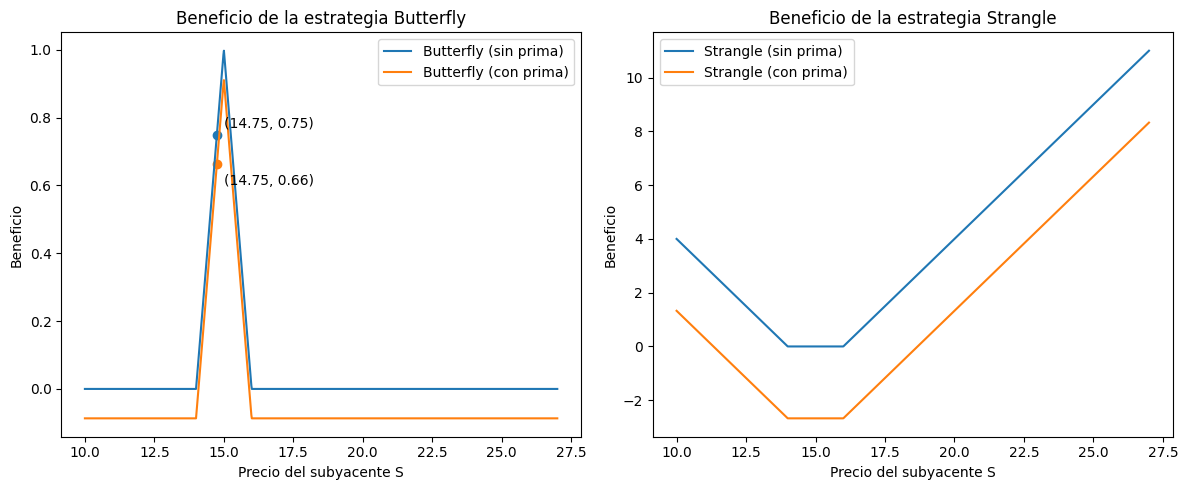

In [ ]:
# ====================
# Gráficos lado a lado
# ====================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ----- Punto a señalar -----
x_punto = 14.75

# Valores en x = 14.75 (Butterfly)
y_butterfly = np.interp(x_punto, x, butterfly)
y_butterfly_prima = np.interp(x_punto, x, butterfly_prima)

# Butterfly (izquierda)
axes[0].plot(x, butterfly, label="Butterfly (sin prima)")
axes[0].plot(x, butterfly_prima, label="Butterfly (con prima)")


axes[0].scatter(x_punto, y_butterfly)
axes[0].scatter(x_punto, y_butterfly_prima)

# Etiquetas del punto
axes[0].annotate(f"({x_punto}, {y_butterfly:.2f})",
                 (x_punto, y_butterfly),
                 textcoords="offset points",
                 xytext=(5, 5))

axes[0].annotate(f"({x_punto}, {y_butterfly_prima:.2f})",
                 (x_punto, y_butterfly_prima),
                 textcoords="offset points",
                 xytext=(5, -15))

axes[0].set_title("Beneficio de la estrategia Butterfly")
axes[0].set_xlabel("Precio del subyacente S")
axes[0].set_ylabel("Beneficio")
axes[0].legend()

# Strangle (derecha)
axes[1].plot(x, strangle, label="Strangle (sin prima)")
axes[1].plot(x, strangle_prima, label="Strangle (con prima)")
axes[1].set_title("Beneficio de la estrategia Strangle")
axes[1].set_xlabel("Precio del subyacente S")
axes[1].set_ylabel("Beneficio")
axes[1].legend()

plt.tight_layout()
plt.show()
